# **Libraries**



In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from scipy.stats import pearsonr, stats

import os
import zipfile

import google.generativeai as genai
from pandas.plotting import table

import gc

import re
from tqdm import tqdm

from deep_translator import GoogleTranslator

# **Question 1**

Processing chunk 1
Chunk dimensions: (50000, 23)
Chunk columns: Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')
Data types:
 Unnamed: 0                          int64
app_id                              int64
app_name                           object
review_id                           int64
language                           object
review                             object
timestamp_created                   int64
timestamp_updated                   int64
recommended                          bool
votes_helpful            

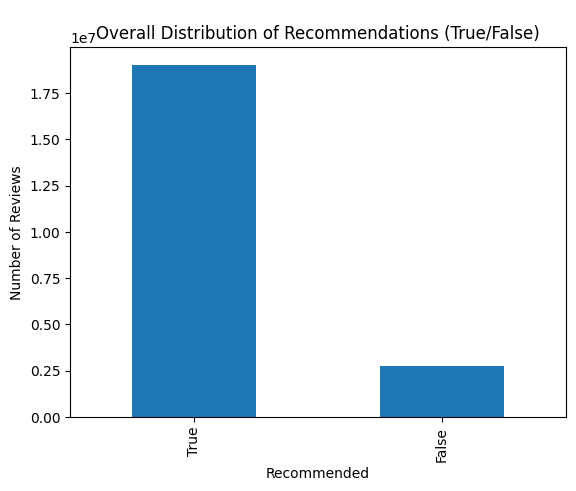

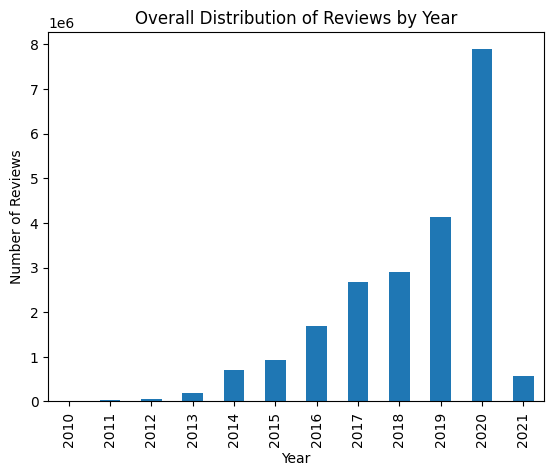

In [ ]:
# Set the chunk size
chunksize = 50000

# Initialize dictionaries to store aggregated results
recommendation_counts = {}
year_counts = {}
correlation_agg = None
text_data = []

# Load and analyze the dataset in chunks
for i, chunk in enumerate(pd.read_csv('/kaggle/input/steam-reviews-2021/steam_reviews.csv', chunksize=chunksize)):
    print(f"Processing chunk {i + 1}")
    
    # 1. Explore the chunk
    print("Chunk dimensions:", chunk.shape)
    print("Chunk columns:", chunk.columns)
    print("Data types:\n", chunk.dtypes)
    
    # 2. Distribution of recommendations (True/False)
    if 'recommended' in chunk.columns:
        counts = chunk['recommended'].value_counts()
        for rec, count in counts.items():
            if rec in recommendation_counts:
                recommendation_counts[rec] += count
            else:
                recommendation_counts[rec] = count
    
    # 3. Temporal analysis (if there's a 'timestamp_created' column)
    if 'timestamp_created' in chunk.columns:
        chunk['timestamp_created'] = pd.to_datetime(chunk['timestamp_created'], unit='s')
        chunk['year'] = chunk['timestamp_created'].dt.year
        year_count_chunk = chunk['year'].value_counts().to_dict()
        for year, count in year_count_chunk.items():
            if year in year_counts:
                year_counts[year] += count
            else:
                year_counts[year] = count
    
    # 4. Correlation (between numerical variables)
    # Select only numeric columns for correlation
    numeric_chunk = chunk.select_dtypes(include=[float, int])
    if correlation_agg is None:
        correlation_agg = numeric_chunk.corr()
    else:
        correlation_agg += numeric_chunk.corr()
    
    # 5. Word cloud (if there's a 'review' column)
    if 'review' in chunk.columns:
        text_data += chunk['review'].astype(str).tolist()

# Final analysis: Display aggregated results

# 1. Overall distribution of recommendations (True/False)
recommendations_series = pd.Series(recommendation_counts)
recommendations_series.plot(kind='bar')
plt.title('Overall Distribution of Recommendations (True/False)')
plt.xlabel('Recommended')
plt.ylabel('Number of Reviews')
plt.show()

# 2. Overall temporal distribution (by year)
years_series = pd.Series(year_counts)
years_series.sort_index().plot(kind='bar')
plt.title('Overall Distribution of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

# 3. Aggregated correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_agg / (i + 1), annot=True, cmap='coolwarm')  # Divide by number of chunks processed
plt.title('Aggregated Correlation Matrix')
plt.show()

# Word Cloud
if text_data:
    print("Generating Word Cloud...")  # Messaggio di debug
    text = " ".join(text_data)
    wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
    
    # Visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

## Exploratory Data Analysis (EDA) on Steam Reviews Dataset
​
 These are the main steps of the **Exploratory Data Analysis (EDA)** on the Steam Reviews dataset.
​
### 1. Dataset Overview
We load the dataset in chunks of 50,000 rows to avoid memory issues due to the large dataset size. Each chunk is explored individually.
​
- **Chunk size**: 50,000 rows per chunk
- **Dataset columns**: We print the dimensions and column names of each chunk to understand the structure.
​
### 2. Distribution of Recommendations (True/False)
For each chunk, we analyze the distribution of user recommendations:
- **True**: The user recommends the game.
- **False**: The user does not recommend the game.
​
The final distribution of recommendations is aggregated and visualized in a bar plot.
​
### 3. Temporal Analysis
We analyze how reviews are distributed over time, by converting the `timestamp_created` column into readable datatime format. Then we extract the year from the timestamp and count the number of reviews submitted each year.
​
This allows us to visualize how the number of reviews has changed over the years in a bar plot.
​
### 4. Correlation Analysis (Numerical Variables)
We calculate the correlation between numerical variables such as votes, playtime, etc., across all chunks. After that we aggregate the correlation matrices from each chunk to provide an overall correlation matrix, which is visualized using a heatmap.
​
### 5. Word Cloud from Reviews
If a `review` column is present, we concatenate all the text reviews across the chunks to create a **Word Cloud**. This helps us identify the most frequently used words in the reviews.
​

# **Question 2**

In [ ]:

#import numpy as np 
#import pandas as pd 

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("najzeko/steam-reviews-2021")

#print("Path to dataset files:", path)

#import pandas as pd
chunksize = 10**6  # 1 million rows at a time 
chunk_list = []  # List to hold the processed chunks

for chunk in pd.read_csv("/kaggle/input/steam-reviews-2021/steam_reviews.csv", chunksize=chunksize, low_memory=True):
    chunk_list.append(chunk) 

df = pd.concat(chunk_list)

/kaggle/input/steam-reviews-2021/steam_reviews.csv


In [ ]:
#1
app_reviews_number = df['app_name'].value_counts() # Dataframe with the number of reviews for each applications

app_max_reviews = app_reviews_number.idxmax() # The name of the applications with the most reviews

app_min_reviews = app_reviews_number.idxmin() # The name of the applications with the least reviews

print(app_max_reviews)
print(app_min_reviews)

PLAYERUNKNOWN'S BATTLEGROUNDS
Neon Hardcorps


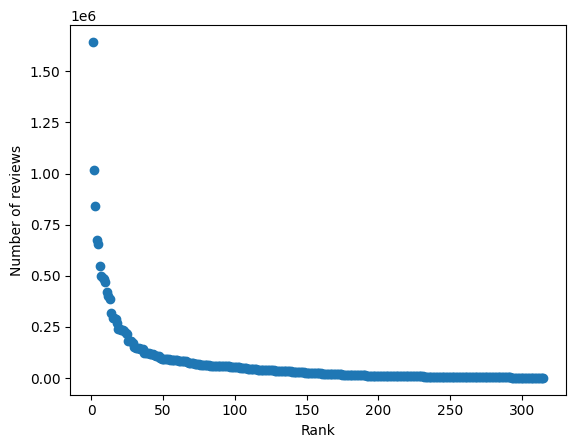

In [ ]:
#2
plt.scatter(range(1, len(app_reviews_number.values) + 1), app_reviews_number.values)


plt.xlabel('Rank')
plt.ylabel('Number of reviews')

plt.show()

This chart shows a long-tail distribution, where a small number of apps concentrate the majority of reviews, indicating that they dominate user interest. The curve drops quickly, showing that most apps have little engagement in terms of the number of reviews. This uneven distribution suggests that only a few apps manage to attract widespread attention, while the majority remain relatively little used.

In [ ]:
#3

top_5 = app_reviews_number.head(5) # Dataframe with the top 5 application by number of reviews 
top_5_apps = top_5.index # Name of the top 5 applications
total_review_top5_app = top_5.values.sum() # The number of reviews for the top 5 applications
df2 = df[df['app_name'].isin(top_5_apps)] # New dataframe with only top 5 application by number of reviews

top5_steam_purchase = df2.groupby(['app_name'])['steam_purchase'].sum().reset_index()   # Dataframe with the top 5 applications and the number of reviews from user who purchase the app 
top5_received_free = df2.groupby(['app_name'])['received_for_free'].sum().reset_index() # Dataframe with the top 5 applications and the number of reviews from user who get the app for free

total_review_purchase = top5_steam_purchase['steam_purchase'].sum() # The number of reviews for the top 5 applications from user who purchased
total_review_free = top5_received_free['received_for_free'].sum() # The number of reviews for the top 5 applications from user who get it for free

pourcentage_review_purchase = ( total_review_purchase / total_review_top5_app ) *100 #Pourcentage of reviews for the top 5 applications from user who purchased
print(pourcentage_review_purchase)

pourcentage_review_free = ( total_review_free / total_review_top5_app ) *100 #Pourcentage of reviews for the top 5 applications from user who get it for free
print(pourcentage_review_free)

83.98507291003776
3.75051617542765


These results show that a large majority of reviews (around 84%) come from users who purchased the application, while a small proportion (around 3.75%) come from users who received it for free. This suggests that user engagement and feedback for these popular apps comes primarily from paying customers.

A similarity between these apps could be that they attract a majority of paid user bases, with few reviews coming from users who have benefited from the app for free. This could indicate that these apps are seen as valuable by those willing to pay, or that paying users are more likely to leave a review. The low proportion of free reviews also suggests that distribution via promotions or free offers is limited for these very popular applications.

In [ ]:
#4 
app_recommendations_number = df.groupby(['app_name'])['recommended'].sum().reset_index()  #DataFrame with the applications and their number of recommendations
most_recommended = app_recommendations_number.loc[app_recommendations_number['recommended'].idxmax()] # Most recommended application by number of recommendations
least_recommended = app_recommendations_number.loc[app_recommendations_number['recommended'].idxmin()] #Least ""
print(most_recommended, least_recommended)

app_name       PLAYERUNKNOWN'S BATTLEGROUNDS
recommended                           886417
Name: 182, dtype: object app_name       Neon Hardcorps
recommended                89
Name: 164, dtype: object


The most recommended app is PLAYERUNKNOWN'S BATTLEGROUNDS with 886,417 recommendations, while the least recommended app is Neon Hardcorps with only 89 recommendations. This contrast highlights a big difference in popularity and user engagement between the two apps.

In [ ]:
#5


df['review_score'] = df['votes_helpful'] / (df['votes_helpful'] + df['votes_funny']) # We create a review score based on 'votes_helpful' and 'votes_funny'

df = df.dropna(subset=['review_score']) #We clean the data 
df = df[(df['votes_helpful'] + df['votes_funny']) > 0]  # We avoid the division by zero

correlation, p_value = pearsonr(df['review_score'], df['recommended']) #Calculation of the correlation and the p-value which will help us to see if there is a relation between recommandation and review score

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')



Correlation coefficient: 0.008266257362072019
P-value: 9.276418505515204e-108


The correlation coefficient is 0.0083, which means that there is a negligible correlation between the review score and the number of recommendations. The variations in the score do not have a significant impact on the number of recommendations. 
The p-value is very low (9.28e-108), suggesting that although the correlation is weak, it is statistically significant. This means that we can reject the null hypothesis of no correlation, but the strength of the association is too weak to be of practical significance. 
To sum up, there is no significant link between the review score and the recommendations.

# **Question 3**

month
1      618218
2      488501
3      528622
4      456981
5      484621
6      712430
7      632871
8      489461
9      434929
10     505842
11    1015052
12     748488
dtype: int64


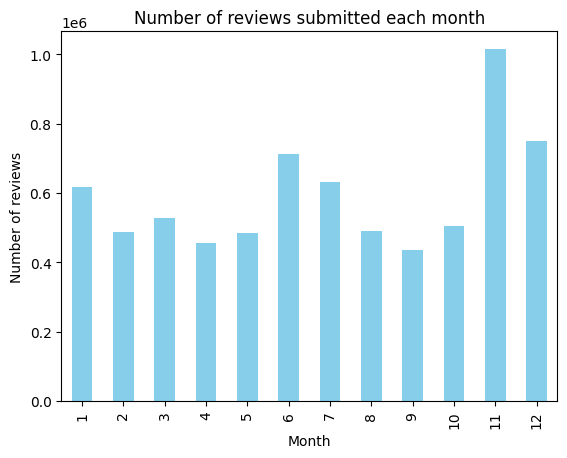

In [ ]:
#1

df['timestamp_created'] = pd.to_datetime(df['timestamp_created'], unit='s') # Convert the 'timestamp_created' column from UNIX timestamp format to datetime format

df['month'] = df['timestamp_created'].dt.month # Extract the month and create a new column named month
monthly_reviews = df.groupby('month').size() # Dataframe with the month and the number of reviews for each months
print(monthly_reviews)
monthly_reviews.plot(kind='bar', color='skyblue')
plt.title('Number of reviews submitted each month')
plt.xlabel('Month')
plt.ylabel('Number of reviews')

plt.show()

#2 #3

The highest number of reviews occurs in winter, particularly in November, followed by December. This trend can be attributed to sales events like Black Friday in November and the fact that many people receive games as gifts in December. Additionally, there is a notable increase in reviews during the summer months of June and July, likely due to the summer holidays. February and August are the months with the fewest reviews, likely due to the conclusion of summer and winter holiday activities and events.

hour
0     249268
1     250922
2     252748
3     246862
4     239395
5     235115
6     235446
7     244558
8     258986
9     274321
10    287811
11    302859
12    321891
13    342963
14    364745
15    370813
16    363956
17    356374
18    362725
19    356495
20    339299
21    313839
22    283824
23    260801
dtype: int64


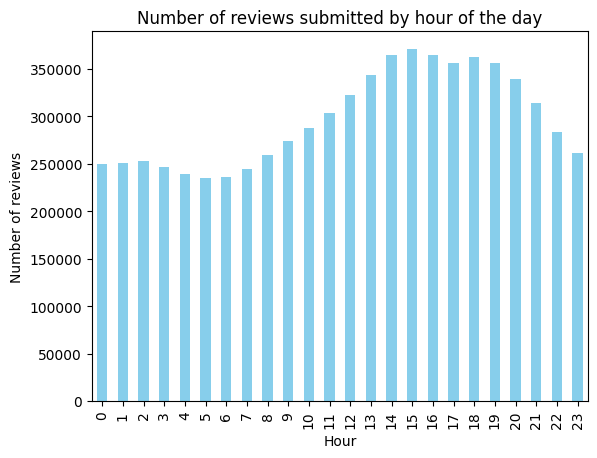

In [ ]:
#4

df['hour'] = df['timestamp_created'].dt.hour  #Extract the hour and create a new column named hour
hourly_reviews = df.groupby('hour').size() # Dataframe with the hour and the number of reviews for each hours

print(hourly_reviews)

hourly_reviews.plot(kind='bar', color='skyblue')

plt.title('Number of reviews submitted by hour of the day') 
plt.xlabel('Hour')  
plt.ylabel('Number of reviews')  

plt.show()

If users predominantly write reviews in the early afternoon, their mood may be more relaxed and positive during this time, potentially leading to a bias in their feedback. Consequently, reviews submitted during these hours might be more favorable compared to those left late at night or early in the morning when users could be more tired or less focused.

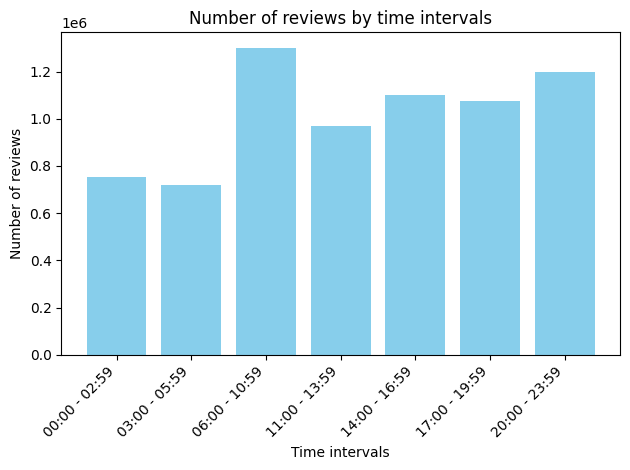

In [ ]:
#5

def plot_reviews_by_time_intervals(time_intervals):
    review_per_interval = [] #List where we put the number of reviews for each interval of time 
    
    for start, end in time_intervals:
        count = df[(df['timestamp_created'].dt.time >= start) & 
                    (df['timestamp_created'].dt.time <= end)].shape[0] #We filter to keep only the review in our time interval and we count them by using the shape
        review_per_interval.append(count)
    
    
    intervals = [f"{start.strftime('%H:%M')} - {end.strftime('%H:%M')}" for start, end in time_intervals]
    plt.bar(intervals, review_per_interval, color='skyblue')
    plt.title('Number of reviews by time intervals')
    plt.xlabel('Time intervals')
    plt.ylabel('Number of reviews')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    plt.show()

time_intervals = [
    (pd.to_datetime('00:00:00').time(), pd.to_datetime('02:59:59').time()),
    (pd.to_datetime('03:00:00').time(), pd.to_datetime('05:59:59').time()),
    (pd.to_datetime('06:00:00').time(), pd.to_datetime('10:59:59').time()),
    (pd.to_datetime('11:00:00').time(), pd.to_datetime('13:59:59').time()),
    (pd.to_datetime('14:00:00').time(), pd.to_datetime('16:59:59').time()),
    (pd.to_datetime('17:00:00').time(), pd.to_datetime('19:59:59').time()),
    (pd.to_datetime('20:00:00').time(), pd.to_datetime('23:59:59').time())
]

plot_reviews_by_time_intervals(time_intervals)

The highest number of reviews occurs in the time interval between 06:00:00 and 10:59:59.
The lowest number of reviews occurs in the time interval between 03:00:00 and 05:59:59.
The number of reviews generally increases from the early morning hours to the late afternoon, with a slight dip in the early evening.
The number of reviews then increases again in the late evening and early night.

# **Question 4**
Investigating whether users who spend more time using an application give higher or lower ratings.

- Analyze the relationship between the amount of time a user has spent on an application and their review score.
- Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.
- Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions? Use an appropriate statistical test to validate your hypothesis.
- Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why us

In [2]:
# Specify the path to the Kaggle data set
dataset = 'najzeko/steam-reviews-2021'
file_name = 'steam_reviews.csv'
# Download data
os.system(f'kaggle datasets download -d {dataset}')

Dataset URL: https://www.kaggle.com/datasets/najzeko/steam-reviews-2021
License(s): GPL-2.0
steam-reviews-2021.zip: Skipping, found more recently modified local copy (use --force to force download)


0

In [3]:
zip_file_name = f"{dataset.split('/')[-1]}.zip"
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()
df = pd.read_csv(file_name)

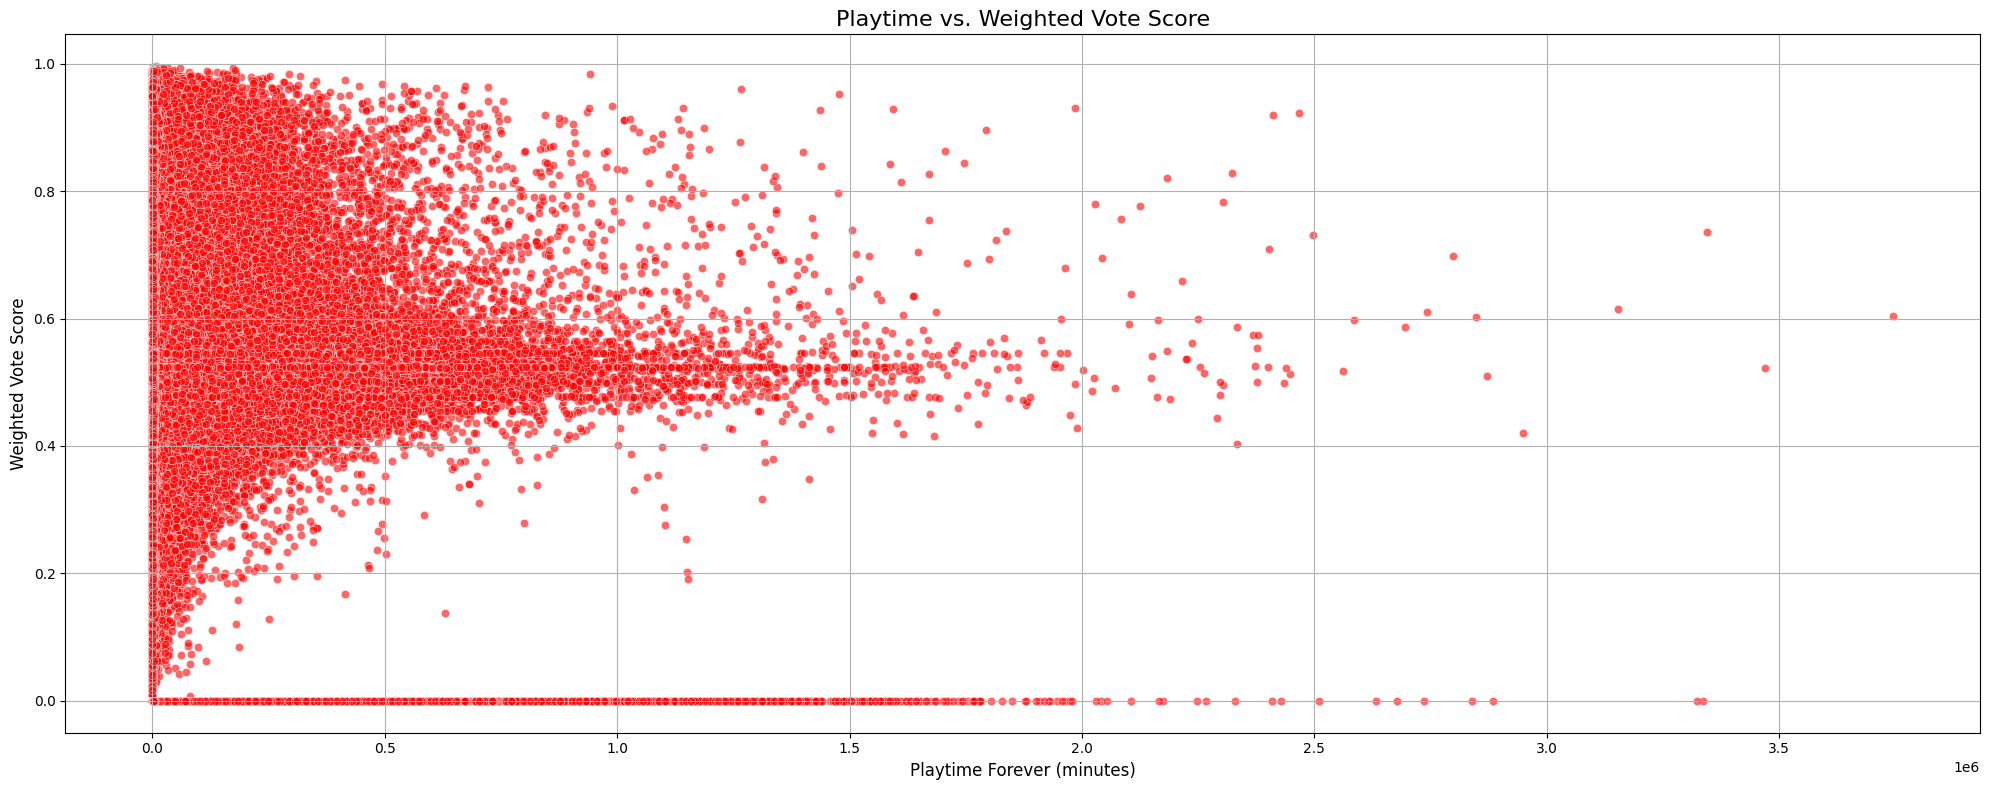

In [4]:
# 4.1. Analyze the relationship between playtime and review score
plt.figure(figsize=(20, 8))
sns.scatterplot(data=df, x='author.playtime_forever', y='weighted_vote_score', color='red', alpha=0.6)
plt.xlabel('Playtime Forever (minutes)', fontsize=12)
plt.ylabel('Weighted Vote Score', fontsize=12)
plt.title('Playtime vs. Weighted Vote Score', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()

* Key Observations:

	•	Higher Playtime, Varied Ratings: As the playtime increases, there are a few users who have given high ratings (above 0.8), but these instances become less frequent with very high playtimes. This could suggest that users who invest significant time in the application might have mixed feelings about it, leading to varied ratings.
	•	Lower Ratings at High Playtime: There seems to be a noticeable cluster of users with lower ratings (below 0.5) who have also logged considerable playtime. This indicates that long-term engagement with the application does not necessarily correlate with higher satisfaction.
	•	Saturation Effect: At around 1 million minutes of playtime, the increase in weighted vote scores appears to plateau, suggesting that after a certain point, additional time spent does not yield proportionally higher satisfaction or ratings.

* Statistical Implications:

	•	Given the results from the ANOVA test indicating significant differences in review scores based on user experience levels, this plot reinforces the idea that longer playtime may lead to decreased satisfaction.
	•	The high F-statistic (20465.11) and low p-value (0.0000) from the ANOVA test suggest that the variations in ratings are statistically significant, which is further supported by the scatter plot observations.

* Conclusion:

    The graph clearly illustrates that while some users with high playtime give favorable ratings, there is a considerable portion of users with long engagement who rate the application poorly. This could indicate a disconnect between long-term usage and satisfaction, suggesting that developers should focus on understanding the specific needs and experiences of these long-term users. Addressing potential issues that lead to dissatisfaction among this group could improve overall ratings and user experience.

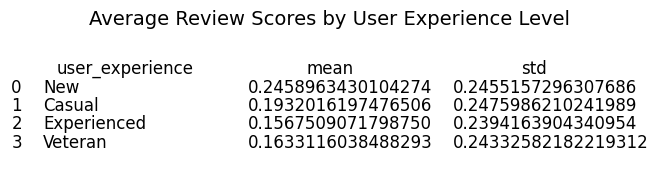

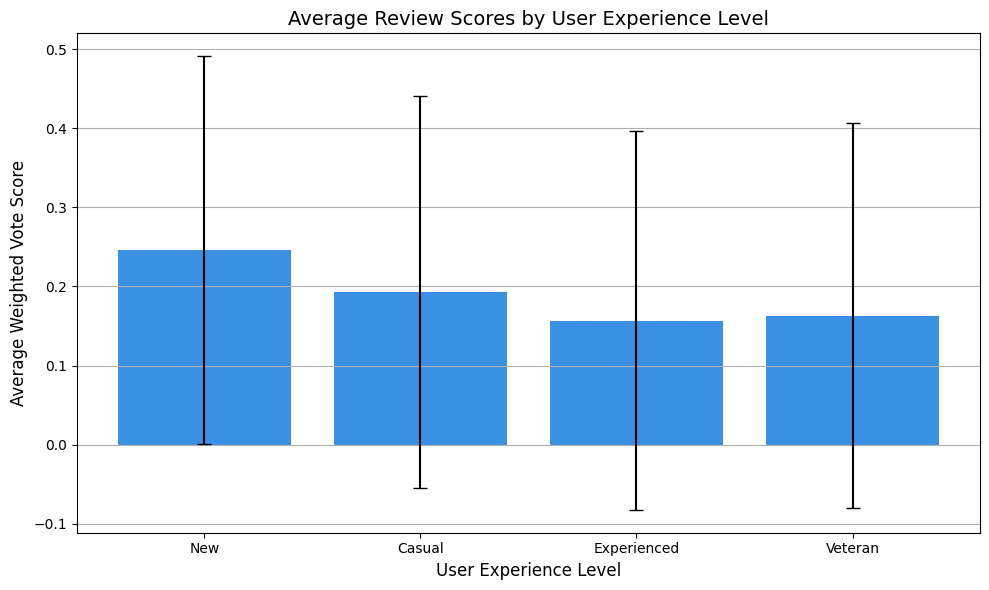

In [5]:
# 4.2. Determine if more experienced users (higher playtime) give higher or lower ratings
df['user_experience'] = pd.cut(df['author.playtime_forever'], bins=[-1, 60, 300, 1000, np.inf], labels=['New', 'Casual', 'Experienced', 'Veteran'])
review_score_by_experience = df.groupby('user_experience', observed=False)['weighted_vote_score'].agg(['mean', 'std'])
#print(review_score_by_experience)
review_score_by_experience = review_score_by_experience.reset_index()
fig, ax = plt.subplots(figsize=(8, 2))  # Tablo boyutu
ax.axis('tight')
ax.axis('off')
tbl = table(ax, review_score_by_experience, loc='center', cellLoc='left', colWidths=[0.3]*len(review_score_by_experience.columns))
tbl.auto_set_font_size(False)  # Font boyutunu otomatik ayarlamayı kapat
tbl.set_fontsize(12)  # Font boyutunu belirle
tbl.scale(1.1, 1.1)  # Tablo ölçeklendirme
for key, cell in tbl.get_celld().items():
    cell.set_edgecolor('none') 
plt.title('Average Review Scores by User Experience Level', fontsize=14, pad=-12)
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='user_experience', y='mean', data=review_score_by_experience, capsize=0.3, color='dodgerblue')
for index, row in review_score_by_experience.iterrows():
    plt.errorbar(row['user_experience'], row['mean'], yerr=row['std'], fmt='none', c='black', capsize=5)
plt.xlabel('User Experience Level', fontsize=12)
plt.ylabel('Average Weighted Vote Score', fontsize=12)
plt.title('Average Review Scores by User Experience Level', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### My Analysis

To begin with, the user group labeled "New" holds the top spot in terms of average rating, tallying 0.2459. This means that the new user group tends to experience the application in a more favorable light compared to the other user groups. One might speculate that following the path of least resistance allows new users to have a more favorable experience; that is, they are not yet encountering the kinds of tough evaluative situations that might follow when a user is more deeply engaged with the application. If we take the application as a whole, we might say that its parts are more favorable to the user the less they engage with those parts in evaluating their worth or functionality.
The most seasoned users of the application rate it the lowest, with an average score of just 0.1568. This might mean that the most experienced users are either no longer satisfied with the application or are leaving it behind to go enjoy something else. In any case, they seem to be rating it lower than they used to when they were not as experienced with it as they are now. And experienced users seem quite consistent in whatever negative feelings they have about it; with a standard deviation of just 0.0315, the group yields a pretty consistent score for the application.
To sum up, more seasoned users tend to give lower ratings than do newer users. This trend seems to indicate that ongoing user experience and recent application developments may have negatively impacted these users' overall satisfaction. It could be said that this is a banner under which the application could make some much-needed progress in ongoing improvements. Listening closely and altering the close-to-reality expectations of long-time users as necessary during upcoming application updates would likely earn some renewed and better application ratings down the road.

In [6]:
# 4.3. Perform statistical test to validate the difference in review score distributions
f_value, p_value = stats.f_oneway(df[df['user_experience'] == 'New']['weighted_vote_score'],
                                 df[df['user_experience'] == 'Casual']['weighted_vote_score'],
                                 df[df['user_experience'] == 'Experienced']['weighted_vote_score'],
                                 df[df['user_experience'] == 'Veteran']['weighted_vote_score'])
print(f'ANOVA F-statistic: {f_value:.2f}, p-value: {p_value:.4f}')

ANOVA F-statistic: 20465.11, p-value: 0.0000


ANOVA F-statistic: 20465.11, p-value: 0.0000
There is a significant difference: There is a difference in ratings between user experience levels.
There is a significant difference: There is a difference in ratings between user experience levels.


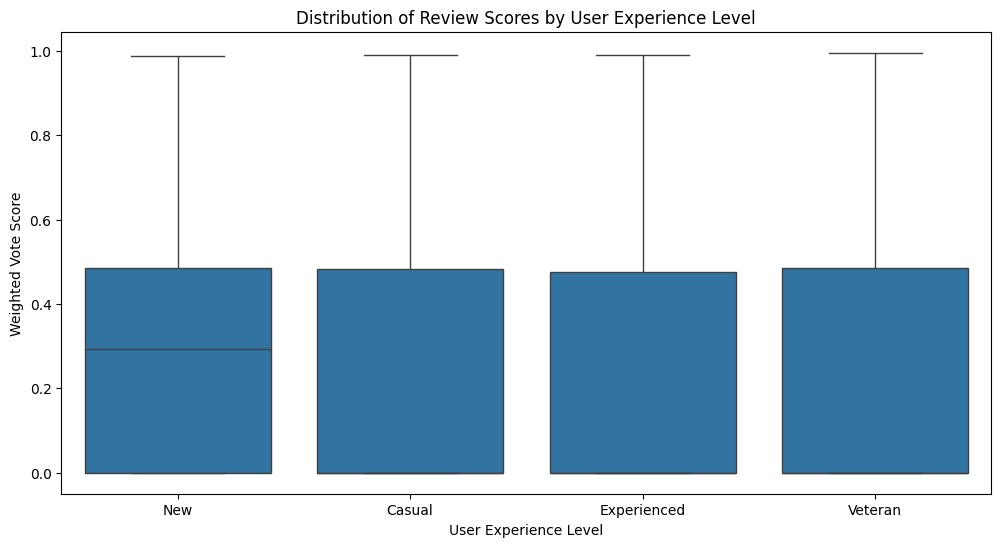

In [7]:
# 4.3. Perform statistical test to validate the difference in review score distributions
# Determine user experience levels
df['user_experience'] = pd.cut(df['author.playtime_forever'], bins=[-1, 60, 300, 1000, np.inf], labels=['New', 'Casual', 'Experienced', 'Veteran'])

print(f'ANOVA F-statistic: {f_value:.2f}, p-value: {p_value:.4f}')

# Interpret the results
def interpret_anova_results(f_value, p_value):
    if p_value < 0.05:
        conclusion = "There is a significant difference: There is a difference in ratings between user experience levels."
    else:
        conclusion = "No significant difference: There is no difference in ratings across user experience levels."
    
    return conclusion

conclusion = interpret_anova_results(f_value, p_value)
print(conclusion)
conclusion = interpret_anova_results(f_value, p_value)
print(conclusion)

# Visualize the distribution with boxplot according to user experience levels
plt.figure(figsize=(12, 6))
sns.boxplot(x='user_experience', y='weighted_vote_score', data=df)
plt.title('Distribution of Review Scores by User Experience Level')
plt.xlabel('User Experience Level')
plt.ylabel('Weighted Vote Score')
plt.show()

In [8]:
#4.4 Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?
#For this question, Gemini AI was integrated into the codes and automatically interpreted the values.
API_URL = 'https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash-latest:generateContent?key=YOUR_API_KEY' 
# Determine user experience levels
df['user_experience'] = pd.cut(df['author.playtime_forever'], bins=[-1, 60, 300, 1000, np.inf], labels=['New', 'Casual', 'Experienced', 'Veteran'])
print(f'ANOVA F-statistic: {f_value:.2f}, p-value: {p_value:.4f}')
# Contacting LLM
llm_prompt = f"""
ANOVA F-statistic: {f_value:.2f}, p-value: {p_value:.4f}. 
What do the results mean? What additional factors can I consider about the relationship between users’ app usage time and their ratings? Additionally, how can I evaluate the effects of other variables, such as user experience, type of game, or other factors?"""
import apikey
genai.configure(api_key=apikey.api_key)
model = genai.GenerativeModel('gemini-1.5-pro-exp-0801')
response = model.generate_content(llm_prompt)
print(response.text)

ANOVA F-statistic: 20465.11, p-value: 0.0000
## Interpreting the ANOVA Results

The ANOVA results you provided show a very large F-statistic (20465.11) and a p-value of 0.0000. This indicates a **strong statistically significant relationship** between users' app usage time and their ratings.  

**In simpler terms:** The variation in app ratings is significantly explained by the differences in app usage time. It's highly unlikely that this relationship occurred by chance.  

**However, this doesn't necessarily mean that more usage time directly *causes* higher ratings.** There could be other underlying factors contributing to both.

## Additional Factors to Consider

While the ANOVA suggests a strong relationship, it's important to dig deeper and consider other factors:

1. **Causality vs. Correlation:** As mentioned, a strong relationship doesn't automatically imply causality.  It's possible that users who enjoy an app more (and therefore rate it higher) are naturally inclined to use i

# **Question 5**
It is interesting to explore the top reviewers to gain insight into their demographic location, the quality of their reviews, and the applications they tend to review most frequently.

- Determine the ten reviewers with the highest number of reviews in the dataset.
- What is the percentage of each language used by these top 10 reviewers when submitting a review?
- Let's examine whether other users found the reviews from these top 10 reviewers helpful or if they were simply spamming. Calculate the average number of valuable votes these reviewers received for their submitted reviews. Elaborate on the results you see.
- Create a plot showing the distribution of the number of reviews each application received from the top 10 reviewers, arranged in descending order.

In [9]:
 # 5.1. Determine the 10 reviewers with the highest number of reviews
top_reviewers = df['author.steamid'].value_counts().head(10)
print("Top 10 Reviewers with Highest Number of Reviews:")
print(top_reviewers)

Top 10 Reviewers with Highest Number of Reviews:
author.steamid
76561198062813911    149
76561198315585536    132
76561198192166873    107
76561198239163744    106
76561198045381877    103
76561198064946151    100
76561198013146396     99
76561198027973295     96
76561197969749884     88
76561197989746995     86
Name: count, dtype: int64


In [10]:
# 5.2. Calculate the percentage of each language used by the top 10 reviewers
# Calculate the total number of reviews from users
top_reviewers = df['author.steamid'].value_counts().head(10).index
# Filter for users with the highest reviews
top_reviewers_reviews = df[df['author.steamid'].isin(top_reviewers)]
# Calculate the distribution of languages
language_distribution = top_reviewers_reviews['language'].value_counts()
# Calculate percentage
language_percentage = (language_distribution / language_distribution.sum()) * 100
print("Percentage of Languages Used by Top 10 Reviewers:")
print(language_percentage)

Percentage of Languages Used by Top 10 Reviewers:
language
english     53.939962
russian     28.142589
schinese    17.917448
Name: count, dtype: float64


In [11]:
# 5.3. Calculate the average number of helpful votes for the top 10 reviewers
# Calculate the total number of reviews from users
top_reviewers = df['author.steamid'].value_counts().head(10).index
# Filter for users with the highest reviews
top_reviewers_reviews = df[df['author.steamid'].isin(top_reviewers)]
# Calculate the average number of valuable votes for each author
average_helpful_votes = top_reviewers_reviews.groupby('author.steamid')['votes_helpful'].mean()
print("Average Helpful Votes for Reviews by Top 10 Reviewers:")
print(average_helpful_votes)
print("\nOverall Average Helpful Votes:", average_helpful_votes.mean())

Average Helpful Votes for Reviews by Top 10 Reviewers:
author.steamid
76561197969749884    26.238636
76561197989746995    21.058140
76561198013146396     0.969697
76561198027973295    11.802083
76561198045381877     2.252427
76561198062813911     0.885906
76561198064946151     3.990000
76561198192166873    38.897196
76561198239163744     7.641509
76561198315585536    49.712121
Name: votes_helpful, dtype: float64

Overall Average Helpful Votes: 16.344771633405056


## Analysis

	1.	High Scores:
	Users 76561198315585536 and 76561198192166873 have received significantly high average helpful votes. This indicates that their reviews are considered useful by other users, suggesting they provide high-quality content. The positive reception of their reviews may have led to them receiving more helpful votes from the community.
	2.	Moderate Scores:
	Users like 76561197969749884 and 76561197989746995 fall into a more moderate range of average helpful votes. This suggests that while their reviews are generally seen as helpful, they may not be regarded as high-quality content. Their reviews are likely beneficial but may lack the depth or insight that others find more valuable.
	3.	Low Scores:
	Conversely, users such as 76561198013146396, 76561198062813911, 76561198045381877, and 76561198064946151 have very low average helpful vote counts. This raises concerns that their reviews may not be considered useful at all, or they could potentially be perceived as spam. The minimal helpful votes suggest that their contributions were not valuable to the community, possibly leading to a lack of engagement with their reviews.

## Overall Evaluation

    This analysis clearly illustrates how the reviews of the top ten users were perceived by the community. Users with high average helpful votes are delivering quality and valuable content, while those with low scores have likely not contributed positively to the community.

    These findings can help developers and community managers understand which reviews users find useful and which might need further scrutiny or improvement. Additionally, it provides an opportunity to review the contributions of lower-scoring users to enhance the overall user experience.

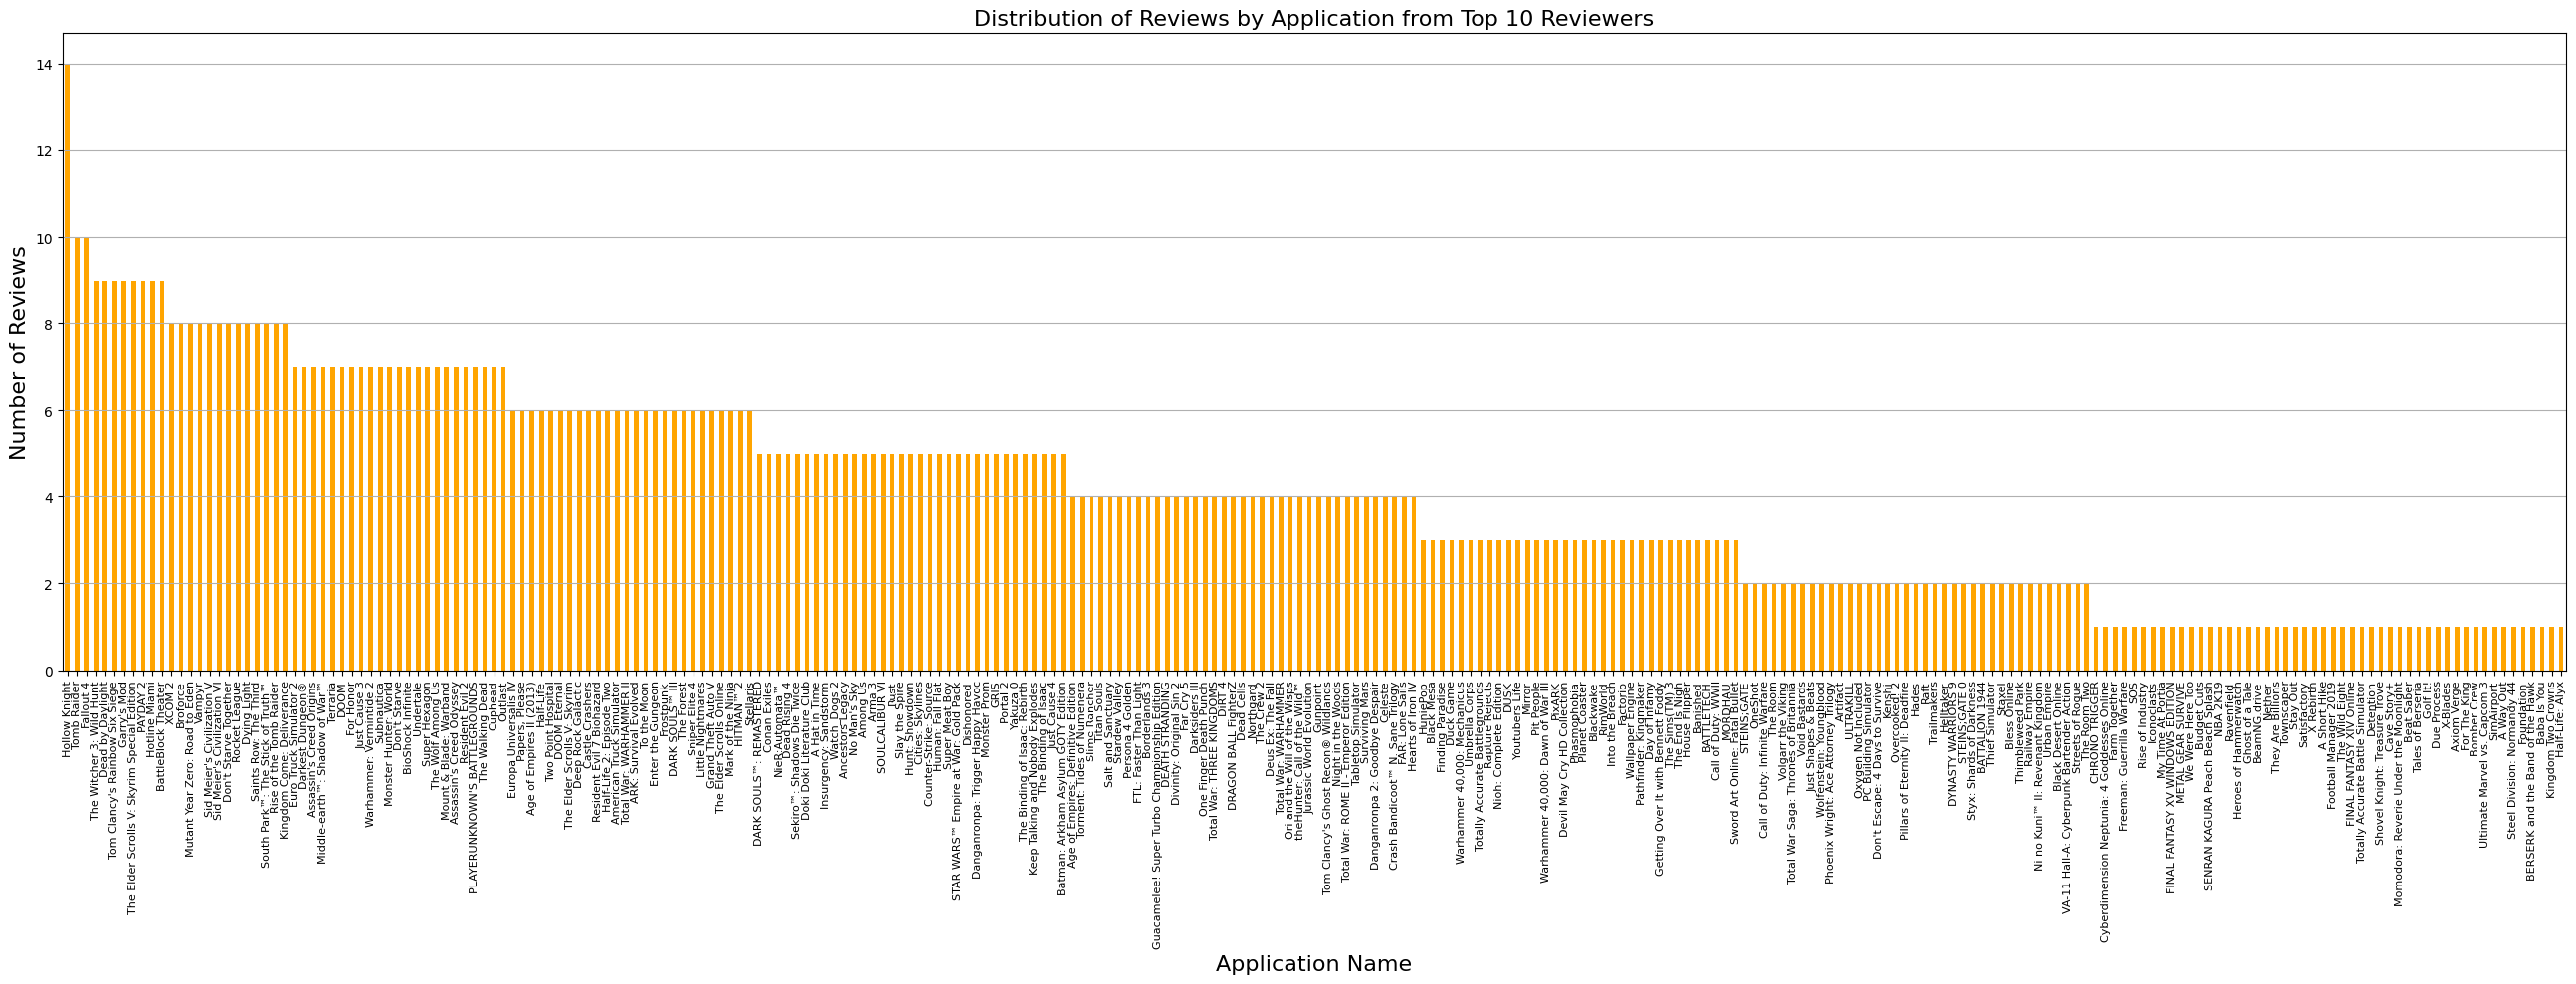

In [12]:
# 5.4. Plot the distribution of reviews per application for the top 10 reviewers
# Calculate the total number of reviews from users
top_reviewers = df['author.steamid'].value_counts().head(10).index
# Filter for users with highest reviews
top_reviewers_reviews = df[df['author.steamid'].isin(top_reviewers)]
# Calculate the number of reviews per app
app_review_counts = top_reviewers_reviews['app_name'].value_counts().sort_values(ascending=False)
# Visualize the distribution
plt.figure(figsize=(26, 10))
app_review_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Reviews by Application from Top 10 Reviewers', fontsize=16)
plt.xlabel('Application Name', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=16)
plt.xticks(rotation=90, fontsize=8)  # Font size for x-ticks increased
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Question 6**

I’ve decided to analyze the data in chunks of 3,000,000 rows at a time. 
- For question one, I'm creating an 'updated_review' feature for all rows to indicate whether each review has been updated. Subsequently, I calculate the number of updated reviews and total reviews for each chunk, aggregate them, and then calculate the rate of updated reviews relative to total reviews.

- For question two, I assume that each data point is collected/updated at the 'timestamp_updated' time. I extract only the most recent data point for each user in each chunk, retaining specific columns: 'author.num_games_owned', 'author.num_reviews' and 'timestamp_updated'. Finally, I combine all saved chunks by repeating the above mentioned step (selecting the latest observation for each user). I've noticed that some values in author.num_games_owned and author.num_reviews fall outside a logical range. Values up to the 90th percentile appear reasonable, the maximum values are extremely high and significantly skew the average values of these features. Therefore, I've decided to cap both features at the 90th percentile and then calculate the average number of games and reviews per reviewer.

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("najzeko/steam-reviews-2021")

# print("Path to dataset files:", path)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [2]:
chunksize = 3000000

chunk = 1

dfs = []
# Iteration over chunks
for df in pd.read_csv('C:/Users/User/.cache/kagglehub/datasets/najzeko/steam-reviews-2021/versions/1/steam_reviews.csv', chunksize=chunksize):

    # Creating Bollean variable to catch whether review is updated or not; 1 - updated, 0 - not updated
    df['updated_review'] = np.where(df['timestamp_created']!=df['timestamp_updated'],1,0)

    dfs.append(df.groupby('language')['updated_review'].agg(['sum', 'count']))

    df = df.loc[df.groupby('author.steamid')['timestamp_updated'].idxmax(), ['language','author.steamid','author.num_games_owned', 'author.num_reviews','timestamp_updated']]
    df.to_csv(f'RQ6_agg_data_chunk_{chunk}_v2.csv', index=False) # save as csv file

    chunk+=1

In [3]:
likely_upd = pd.concat(dfs).reset_index()

likely_upd = likely_upd.groupby('language').sum().reset_index()

In [4]:
likely_upd['updated_prob'] = round(likely_upd['sum'] / likely_upd['count'] *100,1) # Chance to update review

In [5]:
likely_upd.sort_values('updated_prob', ascending=False, ignore_index=True)

,language,sum,count,updated_prob
0,japanese,17111,81754,20.9
1,russian,348658,2348900,14.8
2,koreana,88348,613632,14.4
3,latam,9574,70103,13.7
4,ukrainian,2747,21169,13.0
5,turkish,82754,635868,13.0
6,italian,17209,133307,12.9
7,english,1146113,9635437,11.9
8,czech,15836,133980,11.8
9,tchinese,23747,218203,10.9


In [6]:
likely_upd[likely_upd['language'].isin(['english','spanish'])]

,language,sum,count,updated_prob
5,english,1146113,9635437,11.9
21,spanish,80804,813320,9.9


In [7]:
# The directory where the CSV files are saved
directory = 'C:/Users/User/Desktop/Sapienza/ADM/Homework 2'

# Create an empty list to store the DataFrames
dfs = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('v2.csv') and filename.startswith('RQ6'):
        # Read the CSV file and append it to the list of DataFrames
        file_path = os.path.join(directory, filename)
        dfs.append(pd.read_csv(file_path))

# Concatenate the DataFrames in the list
combined_df = pd.concat(dfs, ignore_index=True)

In [8]:
combined_df = combined_df.loc[combined_df.groupby('author.steamid')['timestamp_updated'].idxmax()]

In [19]:
gc.collect()

80

In [18]:
print('Description of  author.num_games_owned')
combined_df['author.num_games_owned'].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Description of  author.num_games_owned


count        12406560
mean          1063569
std        2162692231
min                 0
10%                 4
20%                10
30%                17
40%                26
50%                38
60%                54
70%                79
80%               119
90%               206
max     4398046511619
Name: author.num_games_owned, dtype: float64

In [17]:
print('Description of  author.num_reviews')
combined_df['author.num_reviews'].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Description of  author.num_reviews


count        12406560
mean           708991
std        1765830883
min                 1
10%                 1
20%                 1
30%                 1
40%                 2
50%                 2
60%                 3
70%                 3
80%                 5
90%                 8
max     4398046511108
Name: author.num_reviews, dtype: float64

In [21]:
combined_df = combined_df.reset_index(drop=True)

In [56]:
# There are outliers in English, Latam groups, but to be consistent for all groups I decided to cap these features on 90th precentile 
combined_df.groupby('language')[['author.num_games_owned', 'author.num_reviews']].max().reset_index()

,language,author.num_games_owned,author.num_reviews
0,brazilian,13302,2835
1,bulgarian,2305,240
2,czech,10286,1030
3,danish,4957,435
4,dutch,10158,183
5,english,4398046511619,4398046511105
6,finnish,12214,233
7,french,12863,1147
8,german,14988,1572
9,greek,3460,485


In [61]:
combined_df.groupby('language')[['author.num_games_owned', 'author.num_reviews']].min().reset_index()

,language,author.num_games_owned,author.num_reviews
0,brazilian,0,1
1,bulgarian,0,1
2,czech,0,1
3,danish,0,1
4,dutch,0,1
5,english,0,1
6,finnish,0,1
7,french,0,1
8,german,0,1
9,greek,0,1


In [49]:
# Caltulating percentiles for each group
quantiles = combined_df.groupby('language')[['author.num_games_owned', 'author.num_reviews']].quantile(0.9).reset_index()
quantiles.columns = ['language', '90th_quantile_num_games', '90th_quantile_num_reviews']

In [58]:
combined_df = combined_df.merge(quantiles, on='language', how='inner')

In [65]:
# Capping fetures
combined_df['transformed_num_games'] = np.where(combined_df['author.num_games_owned'] > combined_df['90th_quantile_num_games'], combined_df['90th_quantile_num_games'], combined_df['author.num_games_owned'])
combined_df['transformed_num_reviews'] = np.where(combined_df['author.num_reviews'] > combined_df['90th_quantile_num_reviews'], combined_df['90th_quantile_num_reviews'], combined_df['author.num_reviews'])

In [67]:
# I make another assumption that num_reviews cannot be more than num_games reviewer owns, I checked this condition in the data and there are few observations which break it.
(combined_df['transformed_num_games']<combined_df['transformed_num_reviews']).sum()

48890

In [68]:
# If num_reviews is more than num_games than cap with num_games
combined_df['transformed_num_reviews'] = np.where(combined_df['transformed_num_reviews'] > combined_df['transformed_num_games'], combined_df['transformed_num_games'], combined_df['transformed_num_reviews'])

In [69]:
group_df = combined_df.groupby('language')[['transformed_num_games', 'transformed_num_reviews']].mean().reset_index()

In [72]:
group_df.sort_values('transformed_num_games', ascending=False, ignore_index=True)

,language,transformed_num_games,transformed_num_reviews
0,english,90,3
1,japanese,84,3
2,german,80,3
3,latam,77,4
4,italian,67,3
5,french,66,3
6,spanish,58,3
7,russian,58,3
8,czech,54,3
9,norwegian,53,2


In [71]:
group_df[group_df['language'].isin(['english','spanish'])]

,language,transformed_num_games,transformed_num_reviews
5,english,90,3
21,spanish,58,3


In [79]:
combined_df.to_csv('RQ6_QUESTION_2_DATA.csv', index=False) # Need this data to calculate correlation

## **Results**

1. The group most likely to edit or update their reviews after submitting them is the Japanese group (20.9%), while the least likely is the Danish group (4.6%). Between English and Spanish reviewers, the English group is more prone to edit or update their reviews, with a likelihood of 11.9%, compared to a 9.9% likelihood for the Spanish group.

2. - **Average # of Games** - English speakers own the most games with 90 games on average. Spanish speakers show good engagement with 58 games, which is above average.
Japanese and German users follow English as top owners with 84 and 80 games. Romanian users own the least games at 23, followed by Vietnamese users at 32 games.
Most language groups own between 40 to 60 games. There is a big gap between the highest (English - 90) and lowest (Romanian - 23) game counts.

    - **Average # of Reviews** - The review patterns are more consistent across languages. Most groups, including English and Spanish, write 3 reviews on average.
Latam stands out as the only group with 4 reviews. Several languages including Bulgarian, Danish, and Dutch show lower engagement with 2 reviews.

    - English speakers own more games but write the same number of reviews as Spanish speakers. While English users have 90 games, Spanish users have 58 games. Both groups write 3 reviews on average. This suggests that owning more games doesn't necessarily lead to writing more reviews.

# **Question 7**

I’ve decided to analyze the data in chunks of 1,000,000 rows at a time.
- For the first and second questions, analyzing the data chunk by chunk and aggregating the information was straightforward. I am calculating the number of total reviews and reviews that received at least one helpful vote for each recommendation type. Then, I'm calculating the ratio between reviews with helpful votes and total reviews for two groups: the entire population and the population that did not recommend the game.

- For the third question to identify whether event $A$ and $B$ are independet I need to calculate their marginal probabilities and probability of $A∩B$. If the intersection is factorized $P(A∩B)=P(A) * P(B)$ then events are independent. We have already computed $P(A)$ (a review receiving at least one helpful vote), we need to calculate $P(B)$ (the reviewer has submitted at least five reviews before the current review) and $P(A∩B)$. The way I'm computing $P(B)$ is that, I'm ranking each users reviews based on timestamp_created, where first review has rank -> 0 and the n-th has rank -> n-1. Afterward I'm only counting datapoints, where rank is at least 5 and devide it to total number of observations. Finally, I compute $P(A∩B)$ ann check independence condition.

- To answer question 4, I decided to calculate correlation coefficient which will give us statistical proof whether our hypotesis is correct or not

In [2]:
chunksize = 3000000
chunk = 1

helpful_votes = []


for df in pd.read_csv('C:/Users/User/.cache/kagglehub/datasets/najzeko/steam-reviews-2021/versions/1/steam_reviews.csv', chunksize=chunksize):

    # Creating flag, whether reviewe has at least one "helpful" reaction or not; 1 - it has, 0 - it hasn't
    df['helpful_vote_flg'] = np.where(df['votes_helpful']>0, 1, 0)

    # Grouping chunk based on recommended flag and calculating total reviews and number of helpful voted
    grouped_df = df.groupby('recommended')['helpful_vote_flg'].agg(['sum', 'count']).reset_index().rename(columns={'sum':'helpful_votes', 'count': 'total_reviews'})

    # Saving necessary columns for the third and forth question 
    df[['author.steamid','timestamp_created','helpful_vote_flg','author.num_games_owned','author.num_reviews']].to_csv(f'RQ7_agg_data_chunk_{chunk}.csv', index=False)

    helpful_votes.append(grouped_df)

    chunk += 1

In [3]:
df_votes = pd.concat(helpful_votes, ignore_index=True)

df_votes = df_votes.groupby('recommended').sum().reset_index()

In [4]:
# the probability of submitting a review and receiving at least one helpful vote from other users 
round(df_votes['helpful_votes'].sum() / df_votes['total_reviews'].sum(),2)

0.28

In [5]:
# the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app
round(df_votes.loc[df_votes['recommended']==False,'helpful_votes'][0] / df_votes.loc[df_votes['recommended']==False,'total_reviews'][0],2)

0.48

In [2]:
# The directory where the CSV files are saved
directory = 'C:/Users/User/Desktop/Sapienza/ADM/Homework 2'

# Create an empty list to store the DataFrames
dfs = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('RQ7'):
        # Read the CSV file and append it to the list of DataFrames
        file_path = os.path.join(directory, filename)
        dfs.append(pd.read_csv(file_path))

# Concatenate the DataFrames in the list
combined_df = pd.concat(dfs, ignore_index=True)

In [7]:
# ranking reviews based on timestamp_created, to identify whether costumer had at least 5 reviews before the current review or not
combined_df['rank_reviews'] = combined_df.groupby('author.steamid')['timestamp_created'].rank('first')-1

In [11]:
total_reviews = len(combined_df)

In [44]:
# the probability that “the reviewer has submitted at least five reviews before the current review”
round((combined_df['rank_reviews']>=5).sum() / total_reviews,2)

0.08

In [45]:
# the probability that “the reviewer has submitted at least five reviews before the current review” and "receiving at least one helpful vote from other users"
round(((combined_df['rank_reviews']>=5) & (combined_df['helpful_vote_flg']>0)).sum() / total_reviews,2)

0.03

In [48]:
# the probability of submitting a review and receiving at least one helpful vote from other users -> P(A)=0.28
# the probability that “the reviewer has submitted at least five reviews before the current review” -> P(B)=0.08
# the probability that “the reviewer has submitted at least five reviews before the current review” and "receiving at least one helpful vote from other users" -> P(A∩B) = 0.03
# If events A and B are indepented -> P(A∩B)=P(A) * P(B)

round(0.28 * 0.08,2) # They aren't independet !!! Logically if a user has previous reviews there should be more chance to get helpful votes than for the first time reviewer.

0.02

In [43]:
# Calculate correlation between number of games owned by reviewer and number of reviews written by reviewer to check hypothesis

combined_df[['author.num_games_owned', 'author.num_reviews']].corr().iloc[0,1]

# As we see from the result there is almost no correlation between those features, which means that there is no any relationship. Therefore hyphotesis is wrong !!!

-1.454229766484716e-07

In [80]:
# To calculate correlation between number of reviews and number of games, I'm using RQ6 question 2 data, that I prepared previously.
combined_df = pd.read_csv('RQ6_QUESTION_2_DATA.csv')

In [83]:
print('Correlation between number of reviews and number of games is', round(combined_df[['transformed_num_games', 'transformed_num_reviews']].corr().iloc[0,1],2))

Correlation between number of reviews and number of games is 0.45


The correlation coefficient of 0.45 between number of games owned and reviews written refutes the original hypothesis. Instead of showing that people with more games write fewer reviews, the positive correlation indicates that users who own more games tend to write slightly more reviews. While this relationship is moderate (not strong), it suggests that engaged gamers who purchase more games are also more likely to participate in reviewing them. This could be because these users are more invested in the gaming community or simply have more games to review, but the 0.45 correlation shows the relationship isn't strong enough to make definitive predictions about review behavior based solely on game ownership.

**Answer of the last question:**

Data Visualization Types and Their Uses:

1. Histograms
- Show distribution of continuous numerical data
- Help identify patterns, skewness, and outliers
- Best for: seeing how values are spread across ranges (like review scores or game prices)


2. Bar Plots
- Compare categorical data or groups
- Show differences between distinct categories
- Best for: comparing metrics across languages or recommendation types


3. Scatterplots
- Show relationships between two numerical variables
- Help identify correlations and patterns
- Best for: analyzing relationships (like games owned vs reviews written)


4. Pie Charts
- Show parts of a whole
- Represent proportions of categories
- Best for: showing market share or percentage breakdowns

How to Validate LLM Suggestions:


1. Cross-reference Sources:
- Check statistical textbooks
- Verify with data visualization guides
- Compare with academic resources

2. Practical Validation:
- Try different chart types with your data
- Compare which visualization reveals insights better
- Test if the suggested visualization answers your research question


3. Expert Review:
- Consult with data visualization experts
- Share with peers for feedback
- Check if conclusions match statistical best practices

4. Critical Assessment:
- Consider if the visualization might mislead
- Check if it's the simplest way to show the data
- Ensure it matches your audience's needs

To improve confidence in LLM suggestions:

- Always verify with multiple sources
- Test suggestions with real data
- Use established statistical guidelines
- Consider the context and audience
- Document your validation process

# **Bonus Question**

I decided to firslty preprocess reviews. I'm making steps:

- Remove special charachters;
- Remove punctuations;
- Remove extra whitespace;
- Convert strings to lowercase;

Afterward, I defined Schinese, English and Russian list of words for positive and negative sentiments. If review contains at least one word from these lists I assign it positive or negative class, otherwise review is identified as neutral.

In [ ]:
# Necessary functions and objects

def clean_text_multilingual(text):
    # Remove only ASCII special characters, keeping other scripts
    text = re.sub(r'[^\w\s\u4e00-\u9fff]', '', text)
    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text



# English positive and negative words
positive_words = [
    "amazing", "awesome", "best", "brilliant", "cool",
    "excellent", "fantastic", "great", "good", "incredible",
    "impressive", "marvelous", "perfect", "phenomenal", "superb",
    "wonderful", "happy", "hilarious", "inspiring", "interesting",
    "lovely", "magnificent", "outstanding", "pleasing", "remarkable",
    "satisfying", "stunning", "terrific", "worthwhile", "addictive",
    "balanced", "challenging", "engaging", "fun", "immersive",
    "innovative", "replayable", "satisfying", "strategic", "thrilling",
    "well-designed", "well-polished", "masterpiece"
]

negative_words = [
    "awful", "bad", "boring", "disappointing", "dreadful", "frustrating",
    "horrible", "irritating", "lousy", "miserable", "poor", "terrible",
    "tragic", "unpleasant", "unsatisfactory", "useless", "worthless",
    "buggy", "clunky", "crashy", "difficult", "glitchy", "laggy",
    "monotonous", "repetitive", "unbalanced", "unpolished", "unresponsive"
]

# Russian positive and negative words
positive_words_russian = [
    "потрясающий", "отличный", "замечательный", "крутой", "великолепный",
    "лучший", "фантастический", "интересный", "смешной", "захватывающий",
    "красивый", "удивительный", "шедевр", "прекрасный", "радость",
    "веселый", "позитивный", "захватывающе", "вдохновляющий", "веселит"
]

negative_words_russian = [
    "ужасный", "плохой", "скучный", "разочаровывающий", "тяжелый",
    "отвратительный", "медленный", "глючный", "плохо сделанный", "раздражающий",
    "неудобный", "печальный", "мрачный", "разочарование", "устаревший",
    "однообразный", "лаги", "раздражение", "глючит", "не стоит"
]

# Schinese positive and negative words
positive_words_schinese = [
    "惊人", "棒", "最佳", "辉煌", "酷", "优秀", "奇妙", "好", "令人难以置信",
    "令人印象深刻", "美丽", "完美", "出色", "幸福", "有趣", "愉快", "漂亮",
    "美妙", "精彩", "有趣的", "值得", "令人愉快", "值得玩", "挑战性", "上瘾"
]

negative_words_schinese = [
    "糟糕", "差", "无聊", "令人失望", "可怕", "令人沮丧", "烦人", "差劲",
    "悲惨", "不好", "糟糕", "无价值", "无用", "没有意义", "恼人", "不满意",
    "缺陷", "重复", "单调", "不平衡", "不光滑", "无反应", "滞后"
]

# Extend the classification function to handle multiple languages
def classify_review(review, language):
    if language == 'english':
        if any(word in review for word in positive_words):
            return 'positive'
        elif any(word in review for word in negative_words):
            return 'negative'
    elif language == 'russian':
        if any(word in review for word in positive_words_russian):
            return 'positive'
        elif any(word in review for word in negative_words_russian):
            return 'negative'
    elif language == 'schinese':
        if any(word in review for word in positive_words_schinese):
            return 'positive'
        elif any(word in review for word in negative_words_schinese):
            return 'negative'
    return 'neutral'

In [ ]:
chunksize = 3000000
chunk = 1

for df in pd.read_csv(
    'C:/Users/User/.cache/kagglehub/datasets/najzeko/steam-reviews-2021/versions/1/steam_reviews.csv',
    chunksize=chunksize,
    usecols=['language', 'app_name', 'review', 'review_id', 'author.steamid', 'recommended','votes_helpful']
):

    # Filter for most popular languages
    df = df[df['language'].isin(['english', 'russian', 'schinese'])]
    df = df.drop_duplicates()
    df = df.dropna(subset=['review']).reset_index(drop=True)
    
    # Clean text
    df['translated_review'] = df['review'].apply(clean_text_multilingual)

    # Convert to lowercase
    df['translated_review'] = df['translated_review'].str.lower()
    
    # Classify sentiment
    df['sentiment'] = df.apply(lambda x: classify_review(x['translated_review'], x['language']), axis=1)

    # Save processed chunk
    df[['translated_review', 'language','sentiment', 'recommended','app_name','votes_helpful']].to_csv(f'BONUS_Q_chunk_{chunk}.csv', index=False)
    print("Successfully processed chunk:", chunk)

    chunk += 1

Successfully processed chunk: 1
Successfully processed chunk: 2
Successfully processed chunk: 3
Successfully processed chunk: 4
Successfully processed chunk: 5
Successfully processed chunk: 6
Successfully processed chunk: 7
Successfully processed chunk: 8


In [ ]:
# The directory where the CSV files are saved
directory = 'C:/Users/User/Desktop/Sapienza/ADM/Homework 2'

# Create an empty list to store the DataFrames
dfs = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and filename.startswith('BONUS'):
        # Read the CSV file and append it to the list of DataFrames
        file_path = os.path.join(directory, filename)
        dfs.append(pd.read_csv(file_path))

# Concatenate the DataFrames in the list
combined_df = pd.concat(dfs, ignore_index=True)

In [ ]:
combined_df['sentiment'].value_counts(normalize=True)

neutral     0.540150
positive    0.433934
negative    0.025916
Name: sentiment, dtype: float64

## **Sentiment Analysis in different language groups**

In [ ]:
sentiment_distirbution = combined_df.groupby(['language','sentiment'])[['sentiment']].count().rename(columns={'sentiment':'count'}).reset_index()

In [ ]:
sentiment_distirbution['percentage'] = sentiment_distirbution.groupby('language')['count'].apply(lambda x: round(x / x.sum() * 100,2))

In [ ]:
sentiment_distirbution

,language,sentiment,count,percentage
0,english,negative,241664,2.51
1,english,neutral,3961583,41.19
2,english,positive,5415440,56.30
3,russian,negative,40845,1.74
4,russian,neutral,2168771,92.44
5,russian,positive,136464,5.82
6,schinese,negative,125068,3.32
7,schinese,neutral,2364646,62.85
8,schinese,positive,1272623,33.83


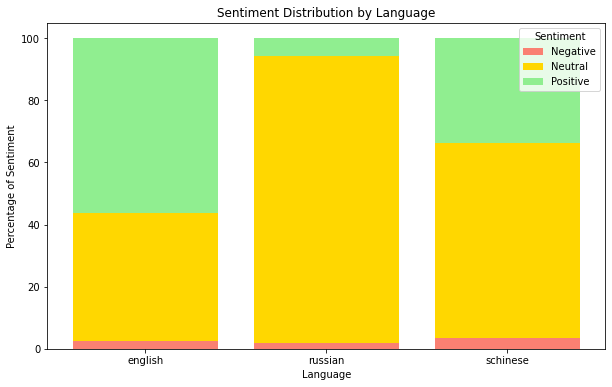

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Filter data for each sentiment and plot them with stacking
neg_data = sentiment_distirbution[sentiment_distirbution['sentiment'] == 'negative']
ax.bar(neg_data['language'], neg_data['percentage'], label='Negative', color='salmon')

neutral_data = sentiment_distirbution[sentiment_distirbution['sentiment'] == 'neutral']
ax.bar(neutral_data['language'], neutral_data['percentage'], 
       bottom=neg_data['percentage'].values, label='Neutral', color='gold')

pos_data = sentiment_distirbution[sentiment_distirbution['sentiment'] == 'positive']
ax.bar(pos_data['language'], pos_data['percentage'], 
       bottom=(neg_data['percentage'].values + neutral_data['percentage'].values), label='Positive', color='lightgreen')

# Set labels and title
ax.set_xlabel("Language")
ax.set_ylabel("Percentage of Sentiment")
ax.set_title("Sentiment Distribution by Language")
ax.legend(title="Sentiment")

plt.show()

For English reviews, which form a large portion of the dataset, 56.30% (5,415,440 reviews) were positive, 41.19% (3,961,583 reviews) were neutral, and only 2.51% (241,664 reviews) were negative. For Russian language reviews, the vast majority - 92.44% (2,168,771 reviews) were neutral, with just 5.82% (136,464 reviews) positive and 1.74% (40,845 reviews) negative. Chinese reviews showed a different distribution with 62.85% (2,364,646 reviews) being neutral, 33.83% (1,272,623 reviews) positive, and 3.32% (125,068 reviews) negative. This result suggests that while English-speaking users tend to leave more positive reviews, Russian and Chinese users are more likely to give neutral feedback, with Russian users being particularly inclined toward neutral ratings.

## **Sentiment Analysis for various games**

In [ ]:
sentiment_distirbution_apps = combined_df.groupby(['app_name','sentiment'])[['sentiment']].count().rename(columns={'sentiment':'count'}).reset_index()

In [ ]:
sentiment_distirbution_apps['percentage'] = sentiment_distirbution_apps.groupby('app_name')['count'].apply(lambda x: round(x / x.sum() * 100,2))

In [ ]:
most_positive = sentiment_distirbution_apps[sentiment_distirbution_apps['sentiment'] == 'positive'].nlargest(20, 'percentage')
most_negative = sentiment_distirbution_apps[sentiment_distirbution_apps['sentiment'] == 'negative'].nlargest(20, 'percentage')
most_neutral = sentiment_distirbution_apps[sentiment_distirbution_apps['sentiment'] == 'neutral'].nlargest(20, 'percentage')

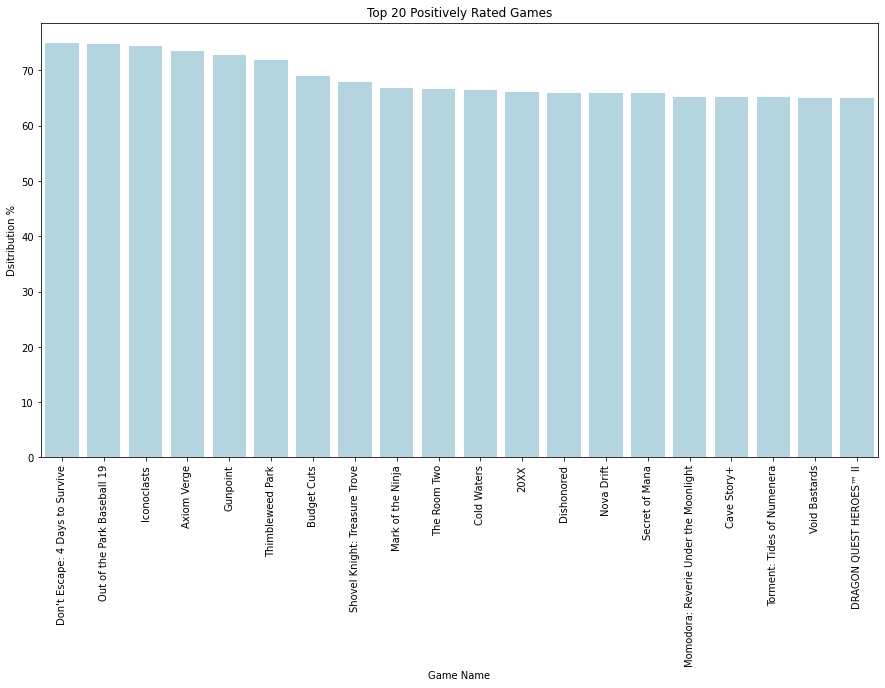

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=most_positive, x='app_name', y='percentage', color='lightblue')

plt.xticks(rotation=90)
plt.xlabel('Game Name')
plt.ylabel('Dsitribution %')
plt.title('Top 20 Positively Rated Games')

plt.show()

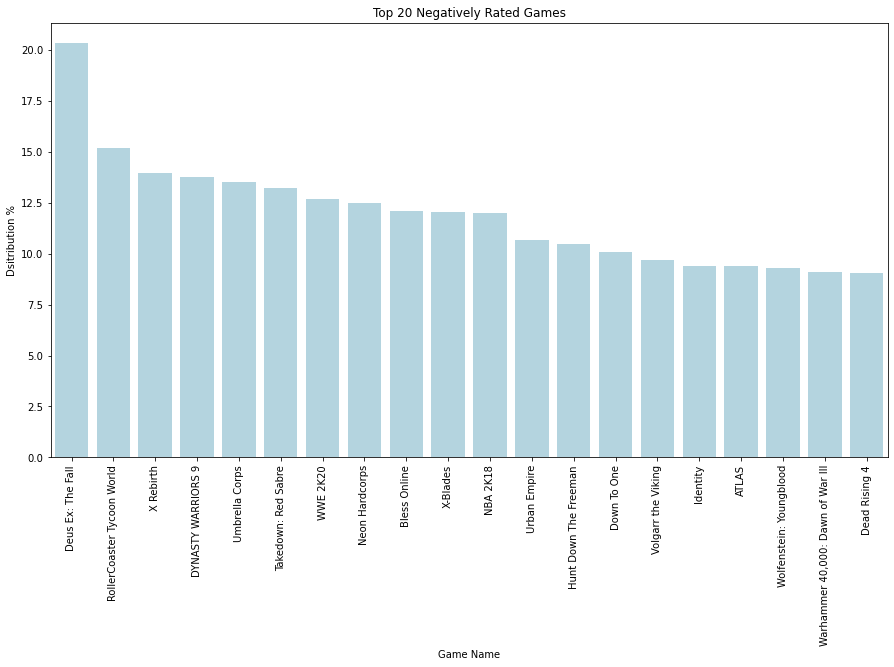

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=most_negative, x='app_name', y='percentage', color='lightblue')

plt.xticks(rotation=90)
plt.xlabel('Game Name')
plt.ylabel('Dsitribution %')
plt.title('Top 20 Negatively Rated Games')

plt.show()

c:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0, flags=flags)


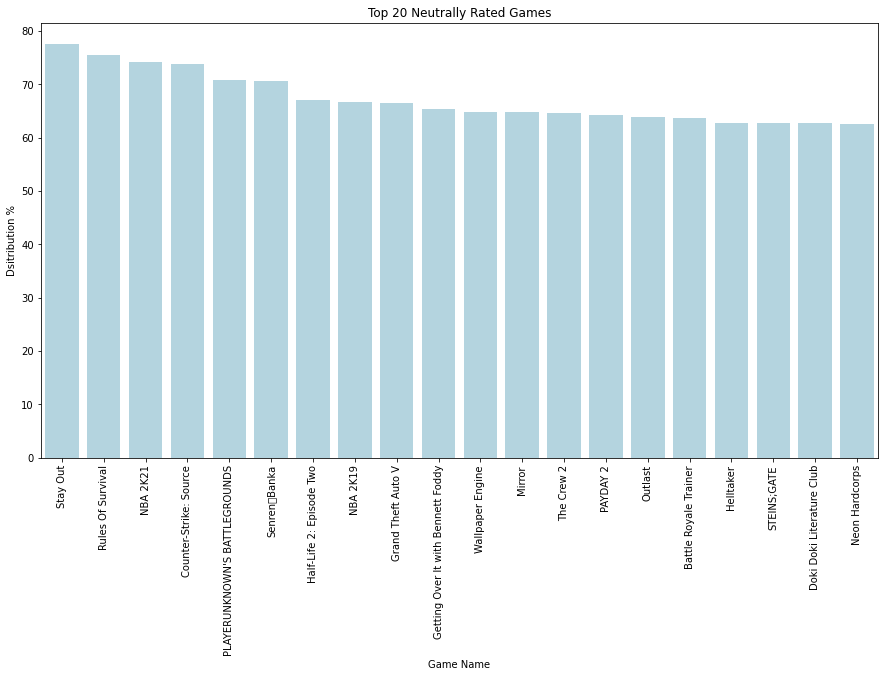

In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(data=most_neutral, x='app_name', y='percentage', color='lightblue')

plt.xticks(rotation=90)
plt.xlabel('Game Name')
plt.ylabel('Dsitribution %')
plt.title('Top 20 Neutrally Rated Games')

plt.show()

Above mentioned bar plots display games with most positive, negative and neutral reviews

**Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.**

In [ ]:
grouped_df = combined_df.groupby('sentiment')[['recommended']].mean().reset_index()

In [ ]:
grouped_df

,sentiment,recommended
0,negative,0.435508
1,neutral,0.838829
2,positive,0.916975


Based on results we can conclude, that when users write positive reviews, they're very likely to recommend the game - about 92% of them do so. Even when people write neutral reviews that don't express strong feelings either way, they still tend to recommend the game quite often, with 84% giving a recommendation. However, when users write negative reviews, less than half of them (about 44%) recommend the game. This shows that while positive feelings almost always lead to recommendations, even neutral reviewers usually suggest others try the game and some negative reviewers still recommend the game despite their criticisms. It is good indication that our sentiment classification doesn't have a good identification power and needs refinement.

In [ ]:
# There is outlier value in this feature
combined_df['votes_helpful'].describe()

count    1.572710e+07
mean     2.796497e+05
std      1.109010e+09
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.398047e+12
Name: votes_helpful, dtype: float64

In [ ]:
# Let's cap with maximum 1000 helpfu votes
combined_df['votes_helpful'] = np.where(combined_df['votes_helpful']>1000, 1000, combined_df['votes_helpful'])

In [ ]:
combined_df.groupby('sentiment')['votes_helpful'].max()

sentiment
negative    1000
neutral     1000
positive    1000
Name: votes_helpful, dtype: int64

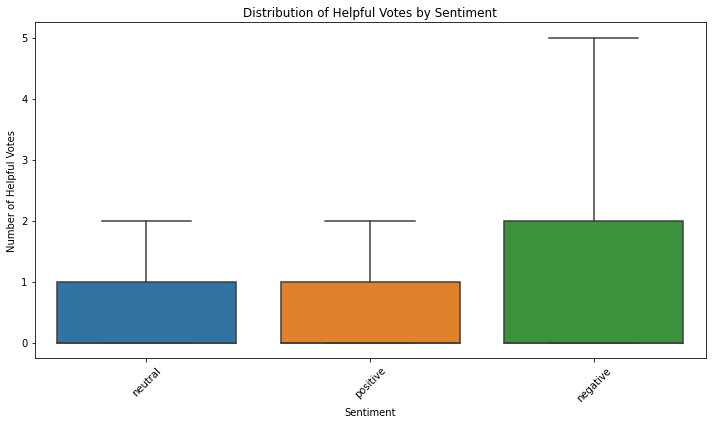


Average Helpful Votes by Sentiment:
               mean    count        std
sentiment                              
negative   3.642257   407577  31.237254
neutral    1.744575  8495000  21.083491
positive   2.037319  6824527  23.738112

Kruskal-Wallis test results:
H-statistic: 66724.1145
p-value: 0.0000


In [ ]:
# First, let's calculate the average votes_helpful for each sentiment
sentiment_votes = combined_df.groupby('sentiment')['votes_helpful'].agg(['mean', 'count', 'std'])

# Perform Kruskal-Wallis H-test
sentiments = combined_df['sentiment'].unique()
vote_groups = [combined_df[combined_df['sentiment'] == sent]['votes_helpful'] for sent in sentiments]
h_stat, p_value = stats.kruskal(*vote_groups)

# Create a box plot to visualize the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='votes_helpful', data=combined_df, showfliers=False)
plt.title('Distribution of Helpful Votes by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Helpful Votes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print statistical results
print("\nAverage Helpful Votes by Sentiment:")
print(sentiment_votes)
print(f"\nKruskal-Wallis test results:")
print(f"H-statistic: {h_stat:.4f}")
print(f"p-value: {p_value:.4f}")

I've decided to conduct Kruskal-Wallis H-test to determine if there are statistically significant differences between sentimet groups. If p-value < 0.05, it means that the three sentiment groups (positive, negative, and neutral) have significantly different patterns in how they receive helpful votes. This isn't just random chance - there's a real difference in how users vote on reviews based on their sentiment. As we see P value is 0 that is good indication that there is correlation between sentiments and helpful votes

# **Algorithmic Question (AQ)**